# 多智能体一致性

### 概念
#### 智能体
智能体可以是一台无人机，一辆自动驾驶汽车，甚至人

**关键特征**
- 能感知周围环境
- 能够根据信息调整自身状态

例如鸟群中每只鸟通过观察周围的鸟，最终实现整个鸟群的同步飞行

---

#### 数学建模


**状态向量**
假设有3个智能体（如无人机），A与B相连，B与C相连，每个智能体的状态（如高度）记作 $x_i$ 则状态向量为

$$
\mathbf{x} = 
\begin{bmatrix}
x_1 \\
x_2 \\
x_3 \\
\end{bmatrix}
$$

初始状态假设为 $\mathbf{x} = \begin{bmatrix} 20, 400, 90 \end{bmatrix}^T$


**通信拓补图**
- 邻接矩阵(在图论笔记中，不在此展开)

$$
\mathbf{A} = 
\begin{bmatrix}
0 & 1 & 0 \\
1 & 0 & 1 \\
0 & 1 & 0 \\
\end{bmatrix}
$$


- 度矩阵D

$$
对角矩阵，D_{ii} 表示智能体i邻居数量
\newline\space\newline
\mathbf{D} = 
\begin{bmatrix}
1 & 0 & 0 \\
0 & 2 & 0 \\
0 & 0 & 1 \\
\end{bmatrix}
$$

- 拉普拉斯矩阵 

$$
\mathbf{L} = \mathbf{D} - \mathbf{A}
\newline\space\newline
\mathbf{L} = 
\begin{bmatrix}
1 & -1 & 0 \\
-1 & 2 & -1 \\
0 & -1 & 1 \\
\end{bmatrix}
$$

---

#### 协议一致性: 动态方程

**每个智能体根据邻居的状态调整自己**

**离散时间更新规则**

$$
x_{i} (t+1) = x_{i} (t) + \epsilon \sum_{j\in N_{i}}^{} (x_j(t) - x_i(t))
$$

其中
- $\epsilon$ 表示学习率
- $N_i$ 表示智能体 $i$ 的邻居集合

写成矩阵形式

$$
\mathbf{x} (t+1) = (\mathbf{E} - \epsilon \mathbf{L})\mathbf{x}(t)
$$

**连续时间更新规则**
$$
\dot{x} = -\mathbf{Lx}(t)
$$

其解为
$$
\mathbf{x}(t) = e^{-\mathbf{Lx}}\mathbf{x}(0)
$$


~~说实话不知道矩阵式怎么推导的，暂且就先死记下来吧~~

**通过动态方程不断迭代使得智能体的状态最终趋于一致（通常收敛值初始状态的平均值）**

### 代码模拟基本的迭代收敛

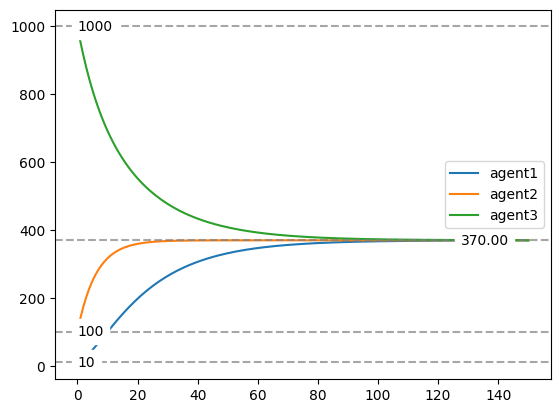

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def multi_agent_const(A, status, lr, epoches):
    # 度矩阵
    D = np.diag(np.sum(A, axis=1))

    # 拉普拉斯矩阵
    L = D - A
    E = np.eye(A.shape[0])

    xt = status
    x_history = [xt]

    for epoch in range(epoches):
        xt = (E - lr * L) @ xt
        x_history.append(xt)

    return xt, np.array(x_history)

# 邻接矩阵
A = np.array(
    [[0, 1, 0],
     [1, 0, 1],
     [0, 1, 0]]
)

# 状态向量
x0 = np.array([10, 100, 1000]).reshape(-1, 1)

xt, x_history = multi_agent_const(A, x0, 0.05, 150)
for i in range(len(xt)):
    plt.plot(x_history[:, i], label=f"agent{i+1}")

# 计算平均值并绘制虚线
mean_val = np.mean(xt)
plt.axhline(y=mean_val, linestyle="--", color='gray', alpha=0.7)

# 标注收敛线的值
plt.text(x=len(x_history) * 0.95, y=mean_val,
         s=f'{mean_val:.2f}',
         ha='right', va='center',
         backgroundcolor='white')

for i in range(len(x0)):
    plt.axhline(y=x0[i, 0], linestyle="--", color='gray', alpha=0.7)
    plt.text(0, y=x0[i, 0],
         s=f'{x0[i, 0]}',
         ha='left', va='center',
         backgroundcolor='white')

plt.legend()
plt.show()